# Shells and Pebbles Detection

* [Google Colab Notebook](https://colab.research.google.com/drive/1Yaxl6XoNH7b1D6dUeLyY20EjU4AECHA1?usp=sharing)
* [Dataset](https://www.kaggle.com/datasets/vencerlanz09/shells-or-pebbles-an-image-classification-dataset)


# Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           9073        274  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            817         35  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2201         68  1.0              
evangower/premier-league-match-

In [3]:
!kaggle datasets download -d vencerlanz09/shells-or-pebbles-an-image-classification-dataset

!mkdir DATASET_IMAGES
!unzip /content/shells-or-pebbles-an-image-classification-dataset.zip -d /content/DATASET_IMAGES/

 99% 194M/195M [00:01<00:00, 145MB/s]
100% 195M/195M [00:01<00:00, 163MB/s]
Archive:  /content/shells-or-pebbles-an-image-classification-dataset.zip
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (10).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (100).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1000).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1001).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1002).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1003).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1004).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1005).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1006).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1007).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1008).jpg  
  inflating: /content/DATASET_IMAGES/Pebbles/Pebbles (1009).jpg  

In [4]:
IMAGE_DIR = "/content/DATASET_IMAGES"

In [5]:
# Create a list of all the class names
import os

class_names = sorted(os.listdir(IMAGE_DIR))
class_names

['Pebbles', 'Shells']

# Split into train, test and validation data (using [splitfolders](https://pypi.org/project/split-folders/))

In [6]:
!pip install split-folders

import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Splitting the data into 3 datasets:**
* 70% in training dataset
* 20% in validation dataset
* 10% in testing dataset

In [7]:
splitfolders.ratio(IMAGE_DIR, output="IMAGES", seed=42, ratio=(.7, .2, .1))

Copying files: 4284 files [00:00, 4655.06 files/s]


In [8]:
# Defining the training, validation and testing directories
IMAGE_DIR = "/content/IMAGES/"

TRAIN_DIR = "/content/IMAGES/train/"
VAL_DIR = "/content/IMAGES/val/"
TEST_DIR = "/content/IMAGES/test/"

# View images in training dataset

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [10]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)
    

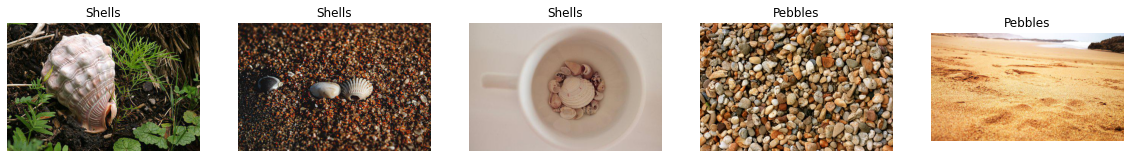

In [11]:
view_random_images(TRAIN_DIR, class_names=class_names)

# Create ImageDataGenerators

Create ImageDataGenerators to Rescale our images between 0 and 1 i.e., **Normalizing** the images. Also performing data augmentation.


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255., 
                                 rotation_range=0.2, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 zoom_range=0.2, 
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255., 
                                  rotation_range=0.2, 
                                  width_shift_range=0.2, 
                                  height_shift_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True)

Creating training, validation and testing data

In [13]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="binary")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Found 2998 images belonging to 2 classes.
Found 856 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


# Creating a basic model

In [14]:
import tensorflow as tf

In [15]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [17]:
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/10
94/94 [==============================] - 59s 567ms/step - loss: 0.9163 - accuracy: 0.6204 - val_loss: 0.6854 - val_accuracy: 0.6402
Epoch 2/10
94/94 [==============================] - 49s 517ms/step - loss: 0.6814 - accuracy: 0.6404 - val_loss: 0.6777 - val_accuracy: 0.6402
Epoch 3/10
94/94 [==============================] - 50s 536ms/step - loss: 0.6742 - accuracy: 0.6404 - val_loss: 0.6712 - val_accuracy: 0.6402
Epoch 4/10
94/94 [==============================] - 49s 527ms/step - loss: 0.6686 - accuracy: 0.6404 - val_loss: 0.6664 - val_accuracy: 0.6402
Epoch 5/10
94/94 [==============================] - 47s 506ms/step - loss: 0.6643 - accuracy: 0.6404 - val_loss: 0.6625 - val_accuracy: 0.6402
Epoch 6/10
94/94 [==============================] - 48s 509ms/step - loss: 0.6611 - accuracy: 0.6404 - val_loss: 0.6599 - val_accuracy: 0.6402
Epoch 7/10
94/94 [==============================] - 49s 521ms/step - loss: 0.6588 - accuracy: 0.6404 - val_loss: 0.6579 - val_accuracy: 0.6402

## Plot the curves

In [18]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


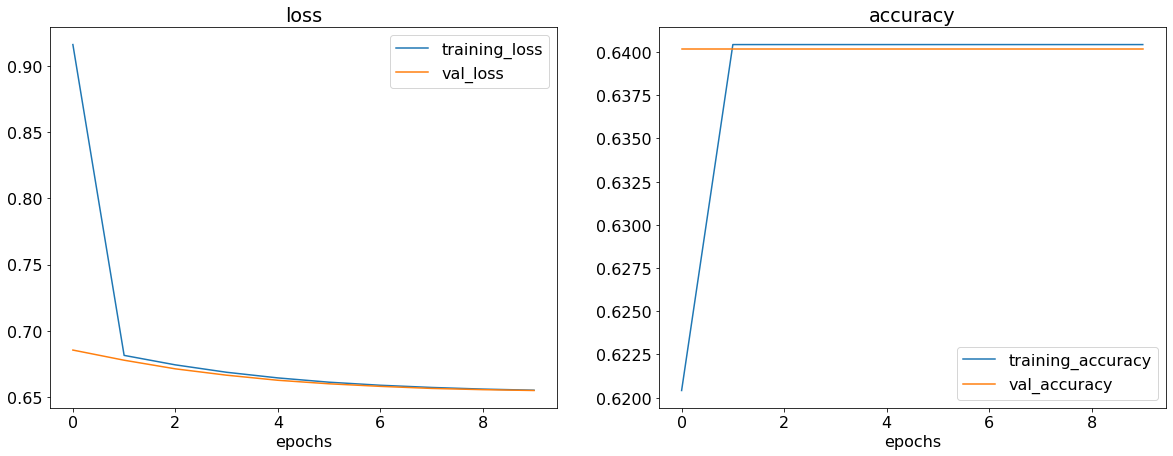

In [19]:
plot_curves(history_1)

## Get predictions on testing data

In [20]:
model_1.evaluate(test_data)

14/14 [==============================] - 5s 378ms/step - loss: 0.6551 - accuracy: 0.6395


[0.6551098227500916, 0.6395348906517029]

## Save the model

In [21]:
model_1.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_1.h5")

# Improving the model (Adding Convolutional Layers)

In [22]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [24]:
history_2 = model_2.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
94/94 [==============================] - 62s 563ms/step - loss: 1.8764 - accuracy: 0.6114 - val_loss: 0.6032 - val_accuracy: 0.6414
Epoch 2/20
94/94 [==============================] - 50s 534ms/step - loss: 0.6229 - accuracy: 0.6468 - val_loss: 0.6132 - val_accuracy: 0.6495
Epoch 3/20
94/94 [==============================] - 51s 542ms/step - loss: 0.6078 - accuracy: 0.6444 - val_loss: 0.5988 - val_accuracy: 0.6437
Epoch 4/20
94/94 [==============================] - 49s 527ms/step - loss: 0.6053 - accuracy: 0.6548 - val_loss: 0.5928 - val_accuracy: 0.6554
Epoch 5/20
94/94 [==============================] - 50s 528ms/step - loss: 0.6012 - accuracy: 0.6678 - val_loss: 0.5820 - val_accuracy: 0.6624
Epoch 6/20
94/94 [==============================] - 51s 540ms/step - loss: 0.5955 - accuracy: 0.6795 - val_loss: 0.5851 - val_accuracy: 0.6998
Epoch 7/20
94/94 [==============================] - 49s 526ms/step - loss: 0.5933 - accuracy: 0.6948 - val_loss: 0.5796 - val_accuracy: 0.6881

## Plot the curves

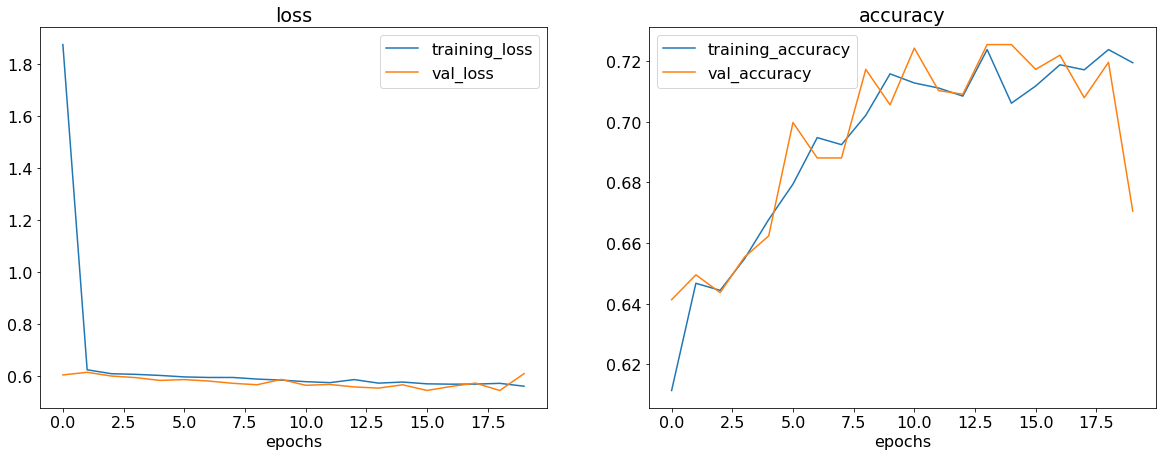

In [25]:
plot_curves(history_2)

## Get predictions on testing data

In [26]:
model_2.evaluate(test_data)

14/14 [==============================] - 6s 395ms/step - loss: 0.6006 - accuracy: 0.7070


[0.600590169429779, 0.7069767713546753]

## Save the model

In [27]:
model_2.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_2.h5")

# Improving the model further (Adding MaxPooling Layers)

In [28]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

## Train the model

In [30]:
history_3 = model_3.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
94/94 [==============================] - 49s 517ms/step - loss: 0.6319 - accuracy: 0.6404 - val_loss: 0.5976 - val_accuracy: 0.6565
Epoch 2/20
94/94 [==============================] - 48s 513ms/step - loss: 0.6079 - accuracy: 0.6731 - val_loss: 0.5760 - val_accuracy: 0.6998
Epoch 3/20
94/94 [==============================] - 49s 525ms/step - loss: 0.5932 - accuracy: 0.6878 - val_loss: 0.5736 - val_accuracy: 0.6869
Epoch 4/20
94/94 [==============================] - 48s 510ms/step - loss: 0.5848 - accuracy: 0.6895 - val_loss: 0.5623 - val_accuracy: 0.7021
Epoch 5/20
94/94 [==============================] - 48s 510ms/step - loss: 0.5775 - accuracy: 0.7051 - val_loss: 0.5536 - val_accuracy: 0.7021
Epoch 6/20
94/94 [==============================] - 49s 525ms/step - loss: 0.5774 - accuracy: 0.6961 - val_loss: 0.5530 - val_accuracy: 0.7313
Epoch 7/20
94/94 [==============================] - 48s 508ms/step - loss: 0.5699 - accuracy: 0.7111 - val_loss: 0.5542 - val_accuracy: 0.7103

## Plot the curves

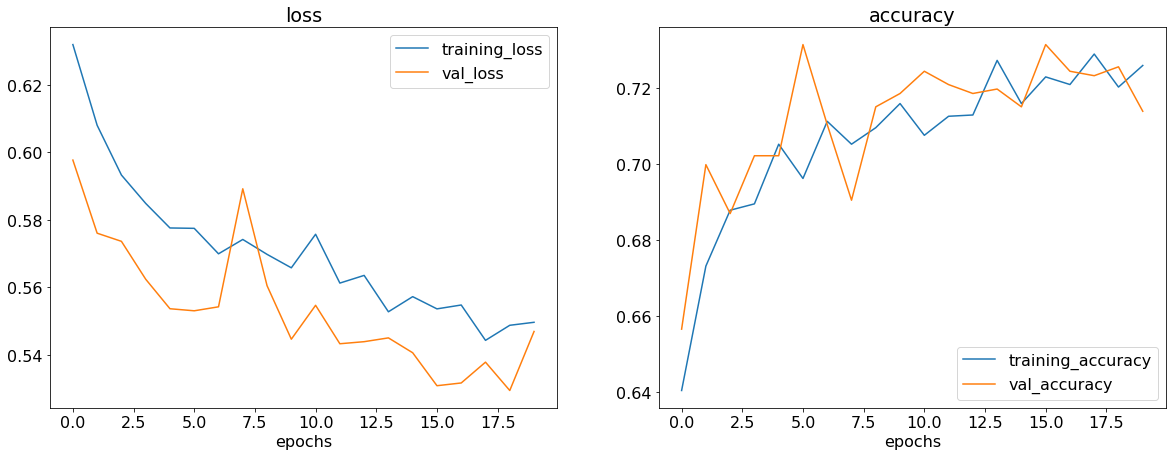

In [31]:
plot_curves(history_3)

## Get predictions on testing data

In [32]:
model_3.evaluate(test_data)

14/14 [==============================] - 5s 382ms/step - loss: 0.5635 - accuracy: 0.7279


[0.5634790658950806, 0.7279070019721985]

## Save the model

In [33]:
model_3.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_3.h5")

# Transfer Learning

In [34]:
import tensorflow_hub as hub

In [35]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [36]:
model_4 = tf.keras.models.Sequential([
    hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224)+(3,)),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')                                  
    ])

model_4.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [38]:
history_4 = model_4.fit(train_data,
            epochs=20,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/20
94/94 [==============================] - 57s 565ms/step - loss: 0.4421 - accuracy: 0.8032 - val_loss: 0.3772 - val_accuracy: 0.8435
Epoch 2/20
94/94 [==============================] - 51s 543ms/step - loss: 0.3573 - accuracy: 0.8469 - val_loss: 0.3375 - val_accuracy: 0.8481
Epoch 3/20
94/94 [==============================] - 52s 557ms/step - loss: 0.3279 - accuracy: 0.8619 - val_loss: 0.3400 - val_accuracy: 0.8493
Epoch 4/20
94/94 [==============================] - 51s 544ms/step - loss: 0.3141 - accuracy: 0.8736 - val_loss: 0.3365 - val_accuracy: 0.8516
Epoch 5/20
94/94 [==============================] - 51s 546ms/step - loss: 0.3088 - accuracy: 0.8766 - val_loss: 0.3654 - val_accuracy: 0.8493
Epoch 6/20
94/94 [==============================] - 55s 588ms/step - loss: 0.2927 - accuracy: 0.8759 - val_loss: 0.3174 - val_accuracy: 0.8657
Epoch 7/20
94/94 [==============================] - 51s 548ms/step - loss: 0.2902 - accuracy: 0.8753 - val_loss: 0.3334 - val_accuracy: 0.8610

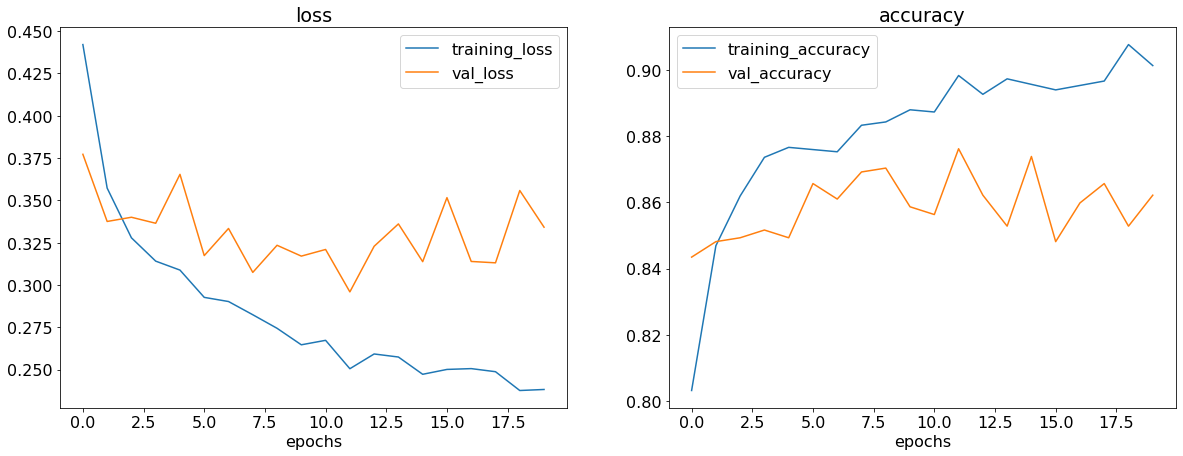

In [39]:
plot_curves(history_4)

In [40]:
model_4.evaluate(test_data)

14/14 [==============================] - 7s 462ms/step - loss: 0.4484 - accuracy: 0.8256


[0.4483521580696106, 0.8255813717842102]

In [41]:
model_4.save("/content/gdrive/MyDrive/ML Notebooks/SSOC/Shells and Pebbles Detection models/model_4.h5")

# Predict a random image from testing dataset

In [45]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

In [46]:
def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

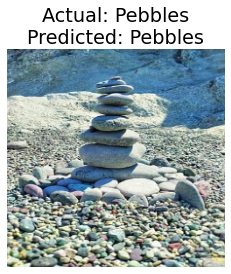

In [47]:
pred_random_image(model_4, TEST_DIR, class_names)